### import the libraries

In [80]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [81]:
model = ResNet50()

In [82]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Load Image 

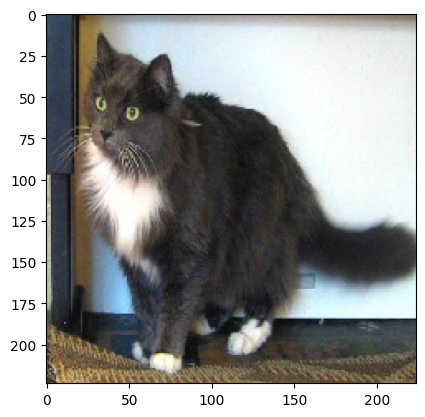

In [83]:
image = load_img('./test_set/9.jpg', target_size=(224, 224))
plt.imshow(image)

### Turn image to array

In [84]:
image = img_to_array(image)
print('min max (before) =', image.min(), image.max())

min max (before) = 0.0 255.0


### Normalized

In [85]:
image = preprocess_input(image)
print('min max (after) =', image.min(), image.max())

min max (after) = -121.68 151.061


In [86]:
image.shape

(224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


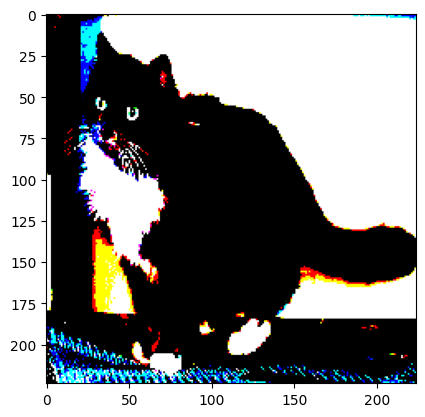

In [87]:
plt.imshow(image)

### Reshape this Image

In [88]:
image = np.expand_dims(image, axis=0)

In [89]:
image.shape

(1, 224, 224, 3)

### Predict This Image

In [90]:
pred = model.predict(image)

1/1 [==============================] - 1s 914ms/step


In [91]:
pred_decode = decode_predictions(pred, top=3)[0]

In [92]:
pred_decode[0]

('n02123045', 'tabby', 0.3415522)

In [93]:
def predict(img_frame):
	img = load_img(img_frame, target_size=(224, 224))
	plt.imshow(img)
	img = img_to_array(img)
	img = np.expand_dims(img, axis=0)
	img = preprocess_input(img)

	pred = model.predict(img)
	pred_decode = decode_predictions(pred, top=3)[0]
	# print(pred_decode[0][1])

	print('Predicted: {} {:.2f}'.format(pred_decode[0][1], pred_decode[0][2] * 100))
	for i in pred_decode:
		print('{:17} {:6.3f}'.format(i[1],i[2]))

1/1 [==============================] - 0s 28ms/step
Predicted: kelpie 29.32
kelpie             0.293
Border_collie      0.117
Cardigan           0.090


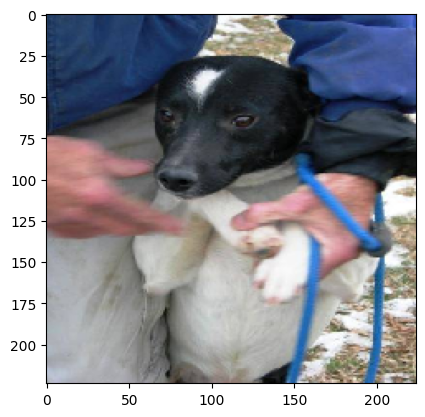

In [94]:
predict('./test_set/1.jpg')

In [95]:
def predict_dog_cat(lst):
	y_pred = []
	y_pred_cls = []
	img_lst = []

	for i in lst:
		# print(i)
		img = load_img(i, target_size=(224, 244))
		img_lst.append(img)
		img = img_to_array(img)

		img = np.expand_dims(img, axis=0)
		img = preprocess_input(img)
		# print(img)
		y_pred_i = model.predict(img)
		pred_decode_i = decode_predictions(y_pred_i, top=3)[0]
		# print(pred_decode_i[0])
		y_pred.append(y_pred_i)
		y_pred_cls.append(pred_decode_i)

	return img_lst, y_pred_cls, y_pred

In [96]:
import glob
mylist = [f for f in glob.glob('./test_set/*')]
img_lst, y_pred_cls, y_pred = predict_dog_cat(mylist)


1/1 [==============================] - 0s 31ms/step


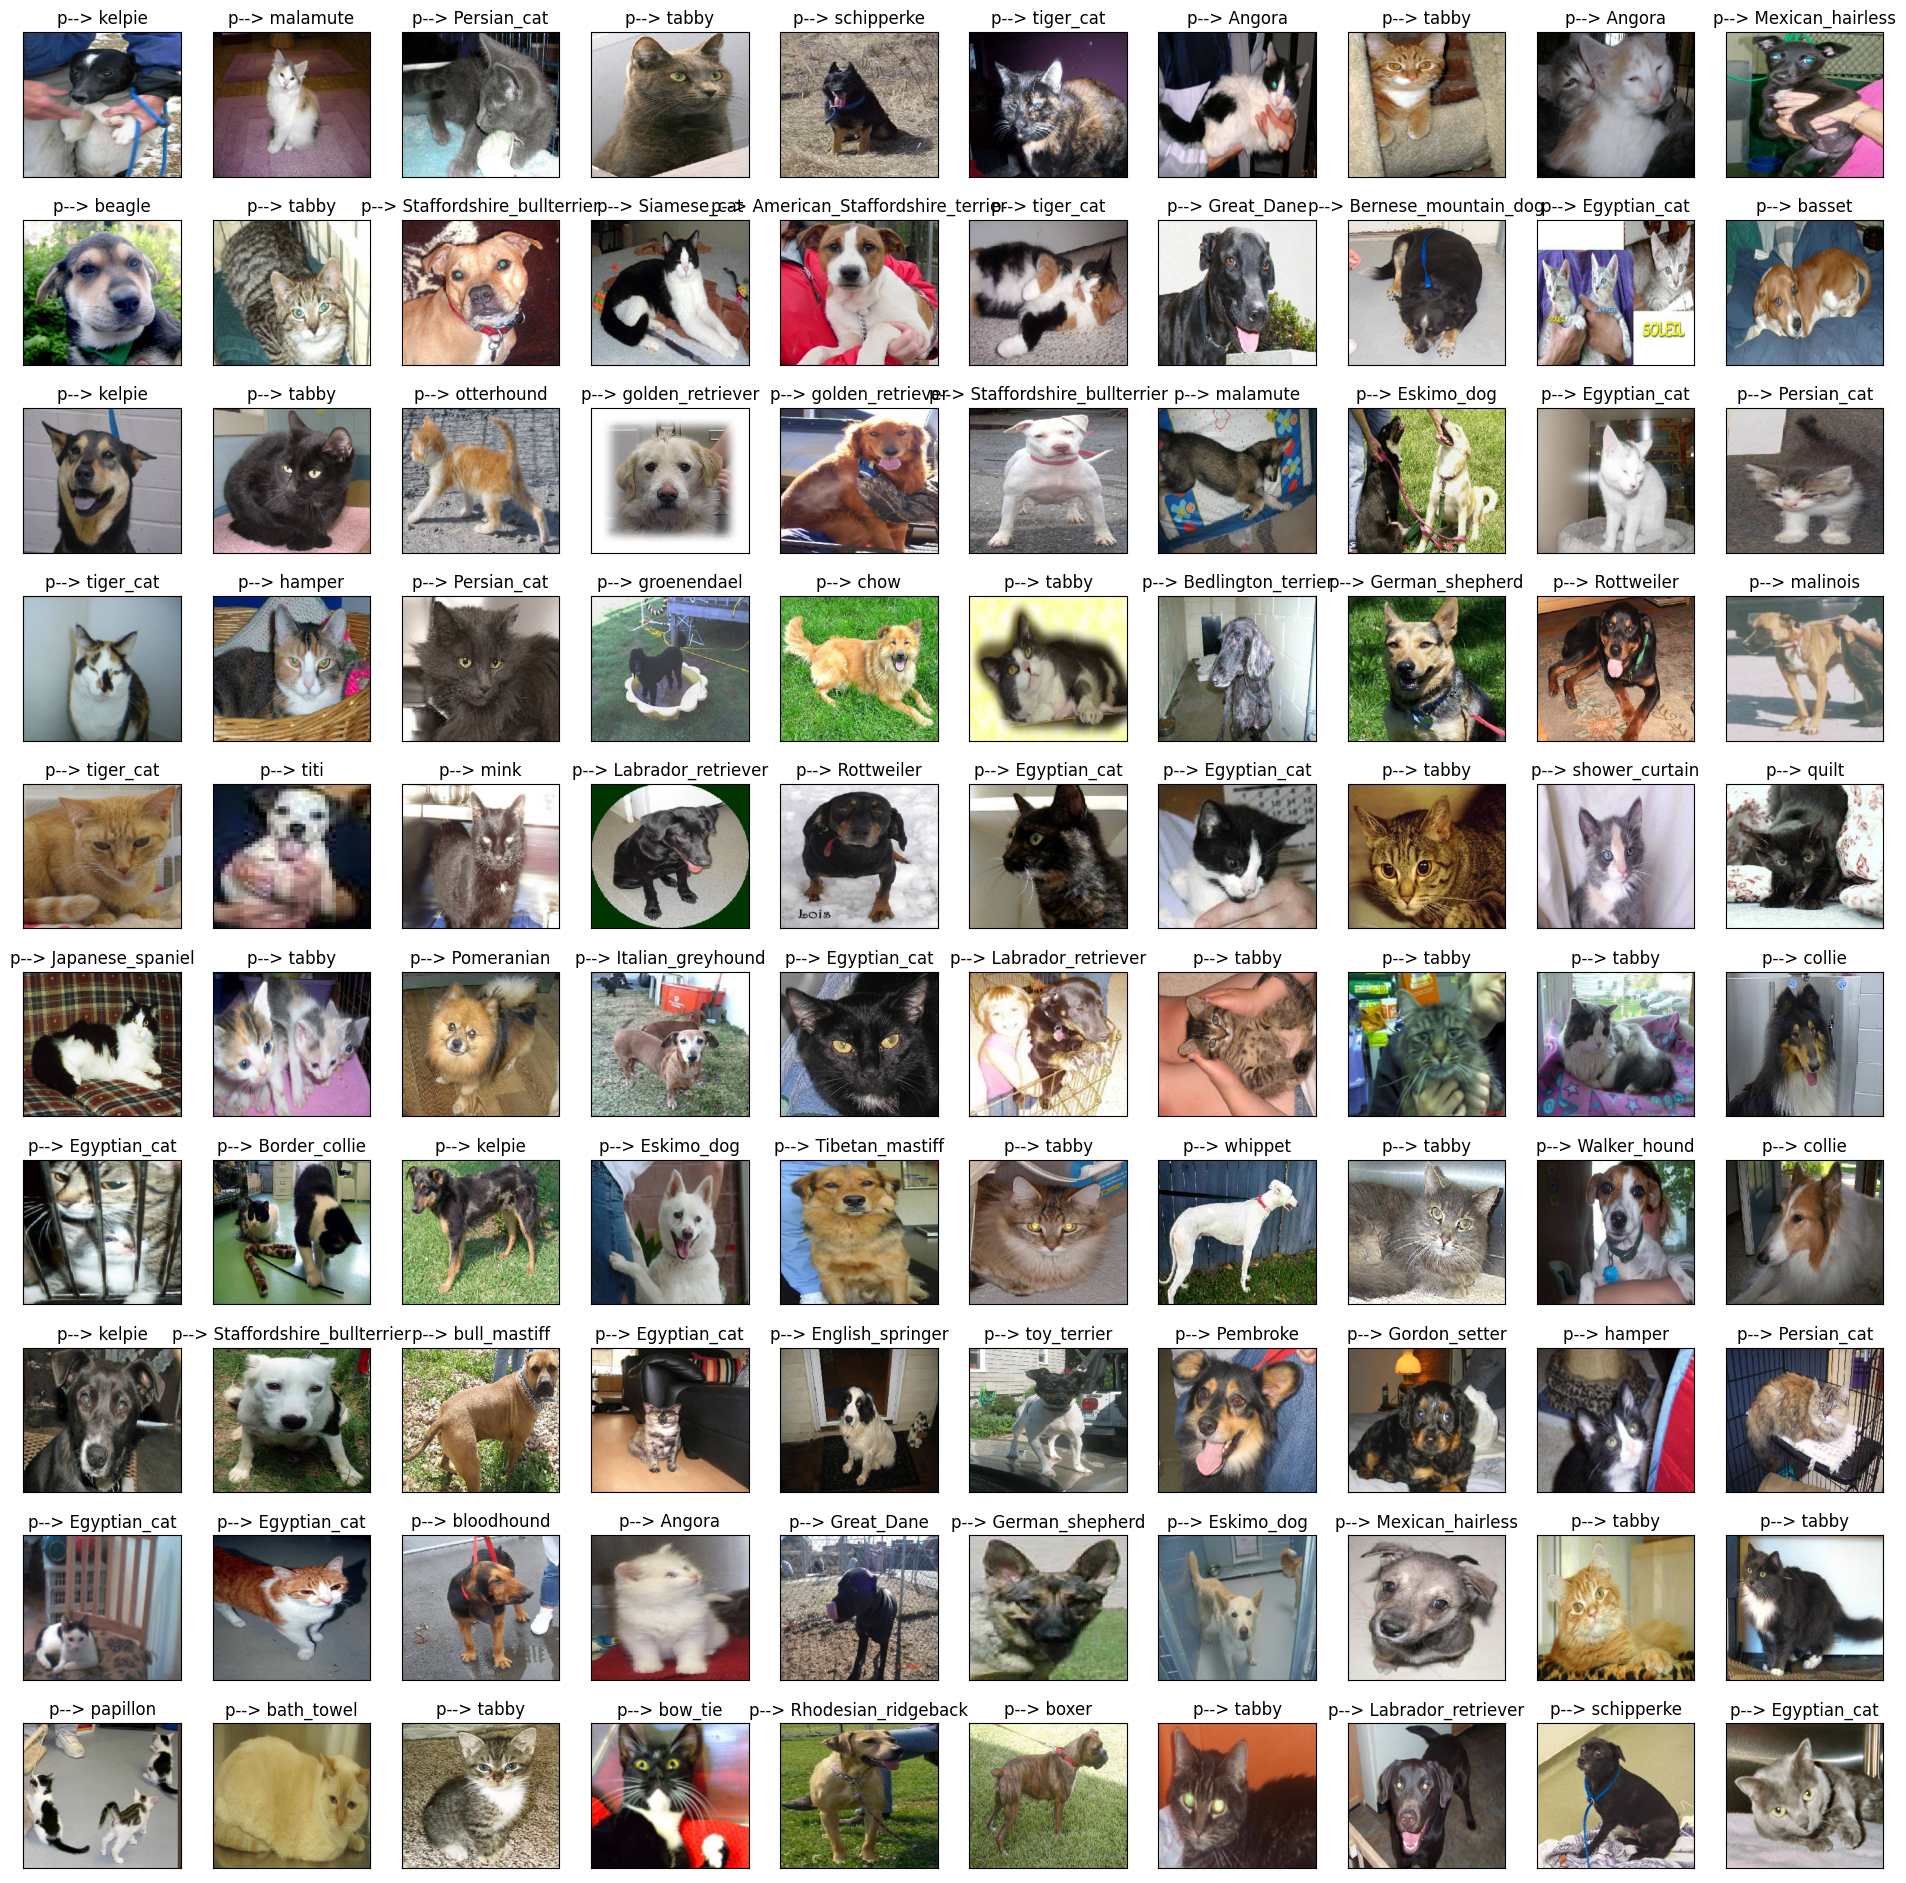

In [97]:
plt.figure(figsize=(24, 24))
for i,k in enumerate(img_lst):
	plt.subplot(10, 10, i + 1)
	plt.imshow(k)
	plt.title('p--> {}'.format(y_pred_cls[i][0][1]))
	plt.xticks([])
	plt.yticks([])
plt.show()